In [6]:
# Global imports & settings
import numpy as np
import pandas as pd

# Visualization (EDA in Colab)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Statistics & utilities
from scipy import stats

# Date and time helpers
from datetime import datetime

# Install Dash and Dash Bootstrap Components if not already installed
!pip install dash dash-bootstrap-components

# Dash (for the interactive website)
from dash import Dash, dcc, html, Input, Output, State, callback_context
import dash_bootstrap_components as dbc

# System / path
import os
from pathlib import Path

# Display options for pandas
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Matplotlib inline for Colab
%matplotlib inline

# **# Phase 1 – Data Loading and Raw Overview**
## 1.1 Load crashes and persons datasets
- `df_persons`: person-level records linked by `COLLISION_ID`


In [7]:
df_crashes = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Crashes.csv", engine='python', on_bad_lines='warn')
df_persons = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Person.csv")

display(df_crashes.head())
display(df_persons.head())

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,4675373.0,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4566131.0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


## 1.2 Basic size and columns overview

Here we check:
- Number of rows and columns for each dataset
- Full column list (to understand what is available)

In [8]:
print("Crashes dataset shape (rows, columns):", df_crashes.shape)
print("Persons dataset shape (rows, columns):", df_persons.shape)

print("\nCrashes columns:")
print(list(df_crashes.columns))

print("\nPersons columns:")
print(list(df_persons.columns))


Crashes dataset shape (rows, columns): (33326, 29)
Persons dataset shape (rows, columns): (39228, 21)

Crashes columns:
['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

Persons columns:
['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID', 'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', '

## 1.3 Info, data types, and memory usage

We inspect:
- Data types of each column
- Non-null counts (very important for missing values later)
- Rough memory usage


In [9]:
print("=== df_crashes.info() ===")
df_crashes.info(memory_usage="deep")

print("\n=== df_persons.info() ===")
df_persons.info(memory_usage="deep")

=== df_crashes.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33326 entries, 0 to 33325
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     33326 non-null  object 
 1   CRASH TIME                     33326 non-null  object 
 2   BOROUGH                        21755 non-null  object 
 3   ZIP CODE                       21752 non-null  float64
 4   LATITUDE                       30597 non-null  float64
 5   LONGITUDE                      30597 non-null  float64
 6   LOCATION                       30597 non-null  object 
 7   ON STREET NAME                 24324 non-null  object 
 8   CROSS STREET NAME              15414 non-null  object 
 9   OFF STREET NAME                9002 non-null   object 
 10  NUMBER OF PERSONS INJURED      33326 non-null  int64  
 11  NUMBER OF PERSONS KILLED       33326 non-null  int64  
 12  NUMBER OF PEDESTRIAN

## 1.4 Quick numerical summary
Get basic statistics of numerical columns to spot:
- Ranges
- Possible impossible values
- General scale of injuries/fatalities

In [10]:
crashes_desc = df_crashes.describe().T
persons_desc = df_persons.describe().T

display(crashes_desc.head(20))   # limit to first 20 rows to keep it readable
display(persons_desc.head(20))

,count,mean,std,min,25%,50%,75%,max
ZIP CODE,21752.0,1.088932e+04,523.538737,1.000000e+04,1.045600e+04,1.120800e+04,1.123700e+04,1.169700e+04
LATITUDE,30597.0,4.045703e+01,3.290969,0.000000e+00,4.066563e+01,4.071397e+01,4.078488e+01,4.091283e+01
LONGITUDE,30597.0,-7.343060e+01,5.971945,-7.425015e+01,-7.396197e+01,-7.392008e+01,-7.386747e+01,0.000000e+00
NUMBER OF PERSONS INJURED,33326.0,4.743744e-01,0.798679,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01
NUMBER OF PERSONS KILLED,33326.0,3.030667e-03,0.058152,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
NUMBER OF PEDESTRIANS INJURED,33326.0,7.012543e-02,0.265389,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
NUMBER OF PEDESTRIANS KILLED,33326.0,1.290284e-03,0.035898,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
NUMBER OF CYCLIST INJURED,33326.0,4.684030e-02,0.215100,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
NUMBER OF CYCLIST KILLED,33326.0,2.100462e-04,0.014492,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
NUMBER OF MOTORIST INJURED,33326.0,3.430355e-01,0.772529,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01


,count,mean,std,min,25%,50%,75%,max
UNIQUE_ID,39228.0,8.706514e+06,1.997935e+06,1257833.0,6397241.25,10254767.5,10265194.25,13190974.0
COLLISION_ID,39228.0,3.946835e+06,3.761311e+05,2607.0,3515238.00,4230278.0,4232927.00,4767320.0
VEHICLE_ID,23335.0,1.915313e+07,2.543995e+05,8397594.0,19144852.50,19147924.0,19151141.00,20773351.0
PERSON_AGE,24746.0,4.262939e+01,1.262370e+02,-957.0,27.00,38.0,53.00,9999.0


## 1.5 Save raw copies (optional)

Save the raw versions of both datasets so we always have an untouched copy to refer back to.


In [11]:
df_crashes_raw = df_crashes.copy()
df_persons_raw = df_persons.copy()

# **Phase 2 – Initial EDA (Pre-cleaning)**

In this phase we:
- Explore key categorical and numerical distributions
- Look at basic time patterns (year, month, hour, weekday)
- Do a quick spatial look (boroughs + rough map)
- Check missing values and obvious data quality issues



=== BOROUGH – value counts (top 10) ===


,count
BOROUGH,
NaN,11571
BROOKLYN,7496
QUEENS,5830
BRONX,4022
MANHATTAN,3582
STATEN ISLAND,825



=== CONTRIBUTING FACTOR VEHICLE 1 – value counts (top 10) ===


,count
CONTRIBUTING FACTOR VEHICLE 1,
Unspecified,8174
Driver Inattention/Distraction,8089
Failure to Yield Right-of-Way,2283
Following Too Closely,2270
Passing or Lane Usage Improper,1562
Passing Too Closely,1299
Unsafe Speed,1206
Backing Unsafely,1035
Other Vehicular,977



=== VEHICLE TYPE CODE 1 – value counts (top 10) ===


,count
VEHICLE TYPE CODE 1,
Sedan,15907
Station Wagon/Sport Utility Vehicle,11554
Taxi,791
Pick-up Truck,673
Bus,607
Box Truck,570
Bike,485
NaN,392
E-Bike,270



=== NUMBER OF PERSONS INJURED – describe() ===


,NUMBER OF PERSONS INJURED
count,33326.000000
mean,0.474374
std,0.798679
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,18.000000


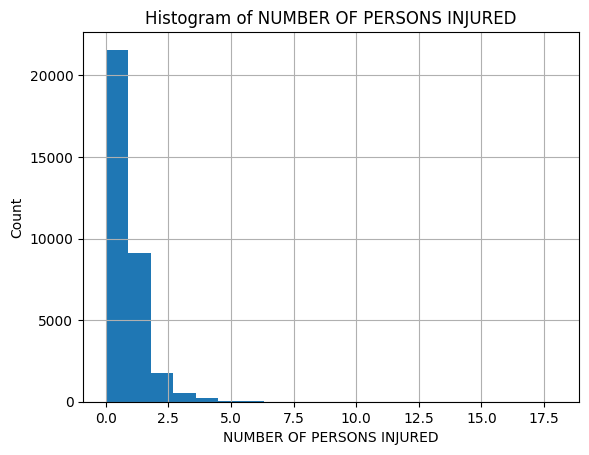


=== NUMBER OF PERSONS KILLED – describe() ===


,NUMBER OF PERSONS KILLED
count,33326.000000
mean,0.003031
std,0.058152
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


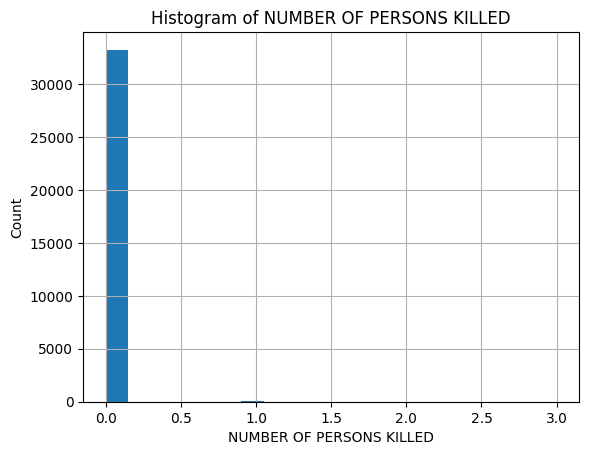


=== NUMBER OF PEDESTRIANS INJURED – describe() ===


,NUMBER OF PEDESTRIANS INJURED
count,33326.000000
mean,0.070125
std,0.265389
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


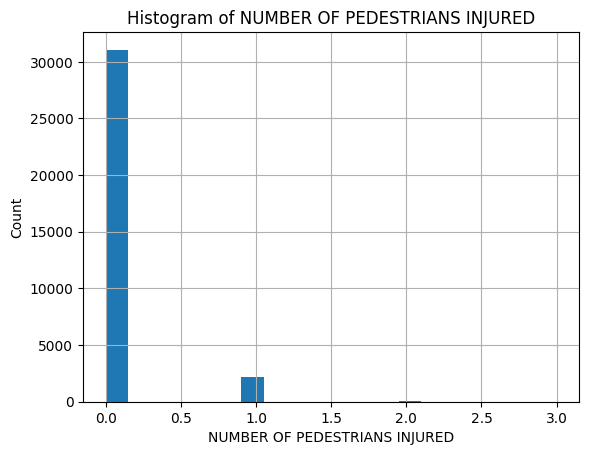


=== NUMBER OF CYCLIST INJURED – describe() ===


,NUMBER OF CYCLIST INJURED
count,33326.00000
mean,0.04684
std,0.21510
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,3.00000


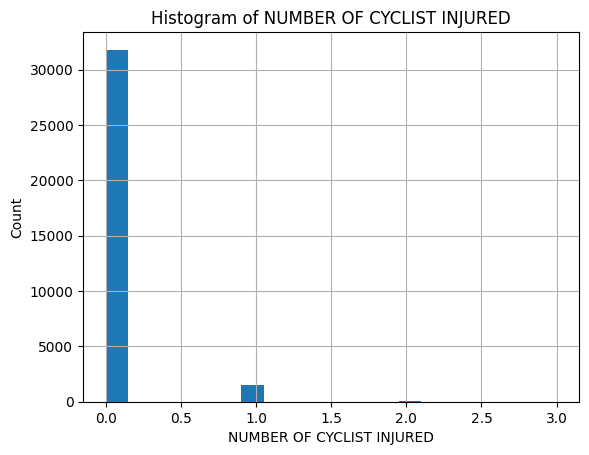


=== NUMBER OF MOTORIST INJURED – describe() ===


,NUMBER OF MOTORIST INJURED
count,33326.000000
mean,0.343035
std,0.772529
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,18.000000


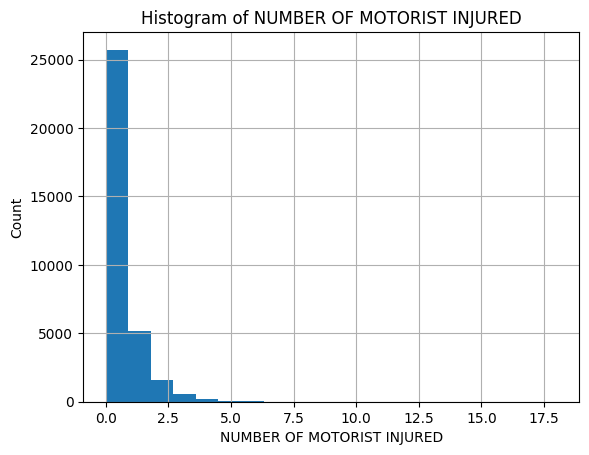

In [12]:
cat_cols = [
    "BOROUGH",
    "CONTRIBUTING FACTOR VEHICLE 1",
    "VEHICLE TYPE CODE 1"
]

num_cols = [
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PERSONS KILLED",
    "NUMBER OF PEDESTRIANS INJURED",
    "NUMBER OF CYCLIST INJURED",
    "NUMBER OF MOTORIST INJURED"
]

# Categorical: value counts (top categories)
for c in cat_cols:
    if c in df_crashes.columns:
        print(f"\n=== {c} – value counts (top 10) ===")
        display(df_crashes[c].value_counts(dropna=False).head(10))

# Numeric: summary + simple histograms
for c in num_cols:
    if c in df_crashes.columns:
        print(f"\n=== {c} – describe() ===")
        display(df_crashes[c].describe())

        plt.figure()
        df_crashes[c].hist(bins=20)
        plt.title(f"Histogram of {c}")
        plt.xlabel(c)
        plt.ylabel("Count")
        plt.show()


# Phase 2.2 – Temporal features


Crashes per year:


,count
CRASH_YEAR,
2012,1
2016,1
2019,2
2020,25
2021,29487
2022,3422
2023,350
2024,38


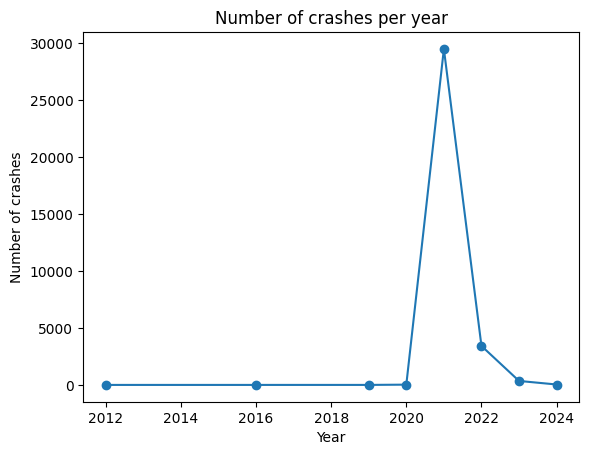


Crashes per month (period):


,count
CRASH_MONTH,
2012-09,1
2016-04,1
2019-04,1
2019-05,1
2020-01,1
2020-03,1
2020-04,4
2020-05,8
2020-06,1


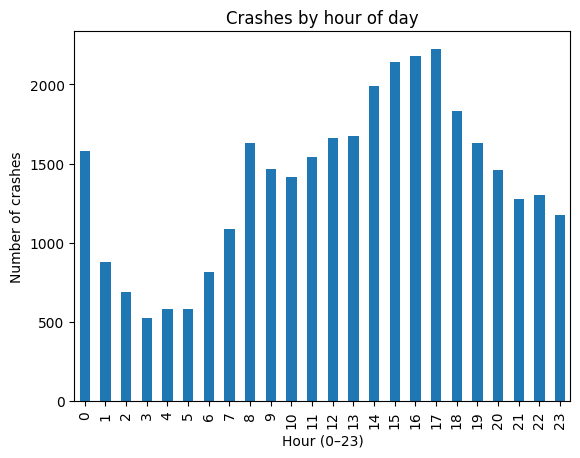

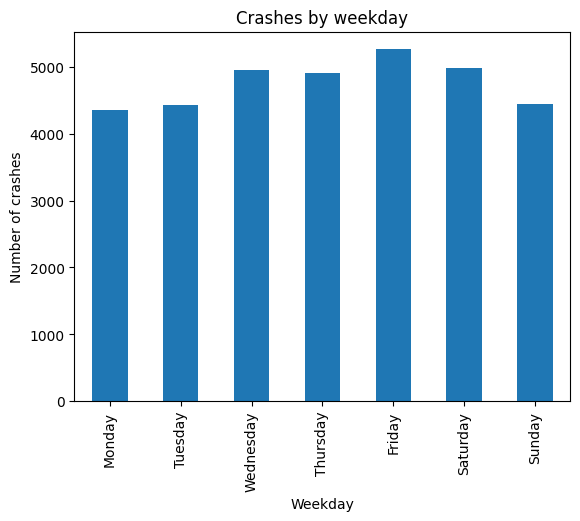

In [13]:
# Make a datetime column (errors='coerce' turns bad rows into NaT)
if "CRASH DATE" in df_crashes.columns and "CRASH TIME" in df_crashes.columns:
    df_crashes["CRASH_DATETIME"] = pd.to_datetime(
        df_crashes["CRASH DATE"].astype(str) + " " + df_crashes["CRASH TIME"].astype(str),
        errors="coerce"
    )

    # Extract parts
    df_crashes["CRASH_YEAR"] = df_crashes["CRASH_DATETIME"].dt.year
    df_crashes["CRASH_MONTH"] = df_crashes["CRASH_DATETIME"].dt.to_period("M").astype(str)
    df_crashes["CRASH_HOUR"] = df_crashes["CRASH_DATETIME"].dt.hour
    df_crashes["CRASH_WEEKDAY"] = df_crashes["CRASH_DATETIME"].dt.day_name()

    # Crashes per year
    crashes_per_year = df_crashes["CRASH_YEAR"].value_counts().sort_index()
    print("Crashes per year:")
    display(crashes_per_year)

    # Line plot: crashes by year
    plt.figure()
    crashes_per_year.plot(kind="line", marker="o")
    plt.title("Number of crashes per year")
    plt.xlabel("Year")
    plt.ylabel("Number of crashes")
    plt.show()

    # Crashes per month-period (YYYY-MM)
    crashes_per_month = df_crashes["CRASH_MONTH"].value_counts().sort_index()
    print("\nCrashes per month (period):")
    display(crashes_per_month.head(24))  # show first 24 for readability

    # Crashes by hour of day
    crashes_by_hour = df_crashes["CRASH_HOUR"].value_counts().sort_index()
    plt.figure()
    crashes_by_hour.plot(kind="bar")
    plt.title("Crashes by hour of day")
    plt.xlabel("Hour (0–23)")
    plt.ylabel("Number of crashes")
    plt.show()

    # Crashes by weekday (order manually)
    weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    crashes_by_weekday = df_crashes["CRASH_WEEKDAY"].value_counts()
    crashes_by_weekday = crashes_by_weekday.reindex(weekday_order)

    plt.figure()
    crashes_by_weekday.plot(kind="bar")
    plt.title("Crashes by weekday")
    plt.xlabel("Weekday")
    plt.ylabel("Number of crashes")
    plt.show()
else:
    print("CRASH DATE / CRASH TIME columns not found – please check column names.")


# Phase 2.3 – Spatial patterns (borough + rough map)


Crashes by borough:


,count
BOROUGH,
BROOKLYN,7496
QUEENS,5830
BRONX,4022
MANHATTAN,3582
STATEN ISLAND,825


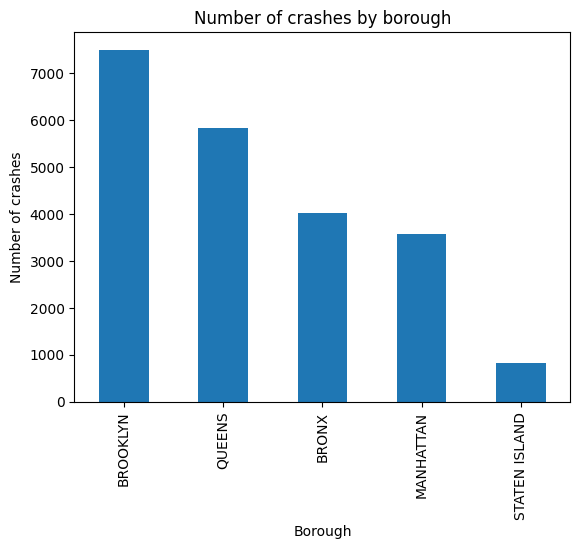

In [14]:
if "BOROUGH" in df_crashes.columns:
    crashes_by_borough = df_crashes["BOROUGH"].value_counts()
    print("Crashes by borough:")
    display(crashes_by_borough)

    plt.figure()
    crashes_by_borough.plot(kind="bar")
    plt.title("Number of crashes by borough")
    plt.xlabel("Borough")
    plt.ylabel("Number of crashes")
    plt.show()

# 2) Rough scatter on latitude/longitude (sample for speed)
lat_col = "LATITUDE"
lon_col = "LONGITUDE"

if lat_col in df_crashes.columns and lon_col in df_crashes.columns:
    # Drop rows with missing coords
    df_geo = df_crashes[[lat_col, lon_col, "BOROUGH"]].dropna()

    # Sample to avoid a massive plot
    df_geo_sample = df_geo.sample(n=min(5000, len(df_geo)), random_state=42)

    fig = px.scatter(
        df_geo_sample,
        x=lon_col,
        y=lat_col,
        color="BOROUGH",
        title="Sample of crash locations (scatter, not real map projection)",
        labels={lon_col: "Longitude", lat_col: "Latitude"}
    )
    fig.show()
else:
    print("Latitude/Longitude columns not found – please check column names.")

# Phase 2.4 – Missing values and simple quality checks


In [15]:
# Missing values % per column (crashes)
missing_crashes = (df_crashes.isna().sum() / len(df_crashes) * 100).sort_values(ascending=False)
print("Missing values in df_crashes (percent):")
display(missing_crashes.head(25))

# Missing values % per column (persons)
missing_persons = (df_persons.isna().sum() / len(df_persons) * 100).sort_values(ascending=False)
print("\nMissing values in df_persons (percent):")
display(missing_persons.head(25))

# Simple impossible values check for some numeric columns
check_cols = [
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PERSONS KILLED",
    "NUMBER OF PEDESTRIANS INJURED",
    "NUMBER OF PEDESTRIANS KILLED"
]

for c in check_cols:
    if c in df_crashes.columns:
        num_negative = (df_crashes[c] < 0).sum()
        print(f"{c}: negative values count = {num_negative}")

Missing values in df_crashes (percent):


,0
VEHICLE TYPE CODE 5,99.213827
CONTRIBUTING FACTOR VEHICLE 5,99.180820
VEHICLE TYPE CODE 4,97.302407
CONTRIBUTING FACTOR VEHICLE 4,97.152374
VEHICLE TYPE CODE 3,90.220849
CONTRIBUTING FACTOR VEHICLE 3,89.473684
OFF STREET NAME,72.988057
CROSS STREET NAME,53.747825
ZIP CODE,34.729641
BOROUGH,34.720639



Missing values in df_persons (percent):


,0
CONTRIBUTING_FACTOR_2,87.460487
CONTRIBUTING_FACTOR_1,87.437545
PED_ACTION,85.806057
PED_LOCATION,85.755073
SAFETY_EQUIPMENT,66.648822
EJECTION,64.670643
POSITION_IN_VEHICLE,64.561028
EMOTIONAL_STATUS,52.648618
COMPLAINT,52.623126
BODILY_INJURY,52.620577


NUMBER OF PERSONS INJURED: negative values count = 0
NUMBER OF PERSONS KILLED: negative values count = 0
NUMBER OF PEDESTRIANS INJURED: negative values count = 0
NUMBER OF PEDESTRIANS KILLED: negative values count = 0


# **Phase 3 – Pre-Integration Cleaning**

This phase focuses on:

Missing values

Dtype fixes (especially datetime)

Outliers

Duplicates

Keeping only useful columns

## 3.1 Cleaning df_crashes
Steps:
1. Fix datetime safely  
2. Handle missing values (decide drop/impute/leave)  
3. Convert numeric columns  
4. Remove impossible/outlier values  
5. Remove duplicates  
6. Create a clean copy (df_crashes_clean)


In [16]:
df_crashes_clean = df_crashes.copy()

df_crashes_clean["CRASH_DATETIME"] = pd.to_datetime(
    df_crashes_clean["CRASH DATE"].astype(str) + " " + df_crashes_clean["CRASH TIME"].astype(str),
    errors="coerce"
)

df_crashes_clean["CRASH_YEAR"] = df_crashes_clean["CRASH_DATETIME"].dt.year
df_crashes_clean["CRASH_MONTH_NUM"] = df_crashes_clean["CRASH_DATETIME"].dt.month
df_crashes_clean["CRASH_DAY"] = df_crashes_clean["CRASH_DATETIME"].dt.day
df_crashes_clean["CRASH_HOUR"] = df_crashes_clean["CRASH_DATETIME"].dt.hour
df_crashes_clean["CRASH_WEEKDAY"] = df_crashes_clean["CRASH_DATETIME"].dt.day_name()

display(df_crashes_clean[["CRASH_DATETIME","CRASH_YEAR","CRASH_HOUR","CRASH_WEEKDAY"]].head())


,CRASH_DATETIME,CRASH_YEAR,CRASH_HOUR,CRASH_WEEKDAY
0,2021-09-11 02:39:00,2021,2,Saturday
1,2022-03-26 11:45:00,2022,11,Saturday
2,2023-11-01 01:29:00,2023,1,Wednesday
3,2022-06-29 06:55:00,2022,6,Wednesday
4,2022-09-21 13:21:00,2022,13,Wednesday


# 3.1.2 – Missing values in key columns


In [17]:
key_cols = [
    "BOROUGH",
    "LATITUDE", "LONGITUDE",
    "ON STREET NAME", "CROSS STREET NAME",
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PERSONS KILLED"
]

df_crashes_clean[key_cols].isna().sum()


,0
BOROUGH,11571
LATITUDE,2729
LONGITUDE,2729
ON STREET NAME,9002
CROSS STREET NAME,17912
NUMBER OF PERSONS INJURED,0
NUMBER OF PERSONS KILLED,0


In [18]:
# Fill numeric injury/fatality NaNs with 0
injury_cols = [
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PERSONS KILLED",
    "NUMBER OF PEDESTRIANS INJURED",
    "NUMBER OF PEDESTRIANS KILLED",
    "NUMBER OF CYCLIST INJURED",
    "NUMBER OF CYCLIST KILLED",
    "NUMBER OF MOTORIST INJURED",
    "NUMBER OF MOTORIST KILLED"
]

for c in injury_cols:
    if c in df_crashes_clean.columns:
        df_crashes_clean[c] = df_crashes_clean[c].fillna(0)


In [19]:
df_crashes_clean["BOROUGH"] = df_crashes_clean["BOROUGH"].fillna("Unknown")


# 3.1.3 – Convert numeric fields to numbers safely


In [20]:
for c in injury_cols:
    df_crashes_clean[c] = pd.to_numeric(df_crashes_clean[c], errors="coerce").fillna(0).astype(int)


# 3.1.4 – Remove impossible negative values


In [21]:
for c in injury_cols:
    neg_count = (df_crashes_clean[c] < 0).sum()
    if neg_count > 0:
        print(f"Correcting {neg_count} negative values in {c}")
    df_crashes_clean.loc[df_crashes_clean[c] < 0, c] = 0

# 3.1.5 – Remove exact duplicates


In [22]:
before = len(df_crashes_clean)
df_crashes_clean = df_crashes_clean.drop_duplicates()
after = len(df_crashes_clean)

print("Duplicates removed:", before - after)

Duplicates removed: 0


#3.1.6 – Finished cleaning crashes

In [23]:
print("df_crashes_clean shape:", df_crashes_clean.shape)
df_crashes_clean.head()


df_crashes_clean shape: (33326, 36)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH_DATETIME,CRASH_YEAR,CRASH_MONTH,CRASH_HOUR,CRASH_WEEKDAY,CRASH_MONTH_NUM,CRASH_DAY
0,09/11/2021,2:39,Unknown,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN,2021-09-11 02:39:00,2021,2021-09,2,Saturday,9,11
1,03/26/2022,11:45,Unknown,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN,2022-03-26 11:45:00,2022,2022-03,11,Saturday,3,26
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,4675373.0,Moped,Sedan,Sedan,NaN,NaN,2023-11-01 01:29:00,2023,2023-11,1,Wednesday,11,1
3,06/29/2022,6:55,Unknown,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN,2022-06-29 06:55:00,2022,2022-06,6,Wednesday,6,29
4,09/21/2022,13:21,Unknown,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4566131.0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2022-09-21 13:21:00,2022,2022-09,13,Wednesday,9,21


## 3.2 Cleaning df_persons

Steps:
1. Keep only relevant columns  
2. Handle missing values  
3. Convert numeric fields  
4. Fix person type categories  
5. Remove duplicates  
6. Create df_persons_clean


In [24]:
keep_cols = [
    "COLLISION_ID",
    "PERSON_TYPE",
    "PERSON_INJURY",
    "PERSON_AGE",
    "PERSON_SEX",
    "EJECTION"
]

df_persons_clean = df_persons[keep_cols].copy()
df_persons_clean.head()

,COLLISION_ID,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,PERSON_SEX,EJECTION
0,4229554,Occupant,Unspecified,NaN,U,NaN
1,4230587,Occupant,Unspecified,33.0,F,Not Ejected
2,4230550,Occupant,Unspecified,55.0,M,NaN
3,3565527,Occupant,Unspecified,NaN,NaN,NaN
4,4231168,Occupant,Unspecified,7.0,F,Not Ejected


#3.2.2 – Handle missing values

In [25]:
df_persons_clean["PERSON_TYPE"] = df_persons_clean["PERSON_TYPE"].fillna("Unknown")

df_persons_clean["PERSON_INJURY"] = df_persons_clean["PERSON_INJURY"].fillna("Unknown")

df_persons_clean["PERSON_AGE"] = pd.to_numeric(df_persons_clean["PERSON_AGE"], errors="coerce")


# 3.2.3 – Standardize categories

In [26]:
df_persons_clean["PERSON_TYPE"] = df_persons_clean["PERSON_TYPE"].str.upper().str.strip()
df_persons_clean["PERSON_INJURY"] = df_persons_clean["PERSON_INJURY"].str.upper().str.strip()

df_persons_clean["PERSON_TYPE"].value_counts().head(10)


,count
PERSON_TYPE,
OCCUPANT,33552
PEDESTRIAN,5526
BICYCLIST,150


**3.2.4 – Remove impossible values**

In [27]:
# Remove impossible negative ages
neg_age = (df_persons_clean["PERSON_AGE"] < 0).sum()
if neg_age > 0:
    print("Correcting negative ages:", neg_age)
df_persons_clean.loc[df_persons_clean["PERSON_AGE"] < 0, "PERSON_AGE"] = np.nan


Correcting negative ages: 3


**3.2.5 – Remove duplicates**

In [28]:
before = len(df_persons_clean)
df_persons_clean = df_persons_clean.drop_duplicates()
after = len(df_persons_clean)

print("Duplicates removed (persons):", before - after)


Duplicates removed (persons): 2111


In [29]:
df_persons_clean.info()
df_persons_clean.head()


<class 'pandas.core.frame.DataFrame'>
Index: 37117 entries, 0 to 39227
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COLLISION_ID   37117 non-null  int64  
 1   PERSON_TYPE    37117 non-null  object 
 2   PERSON_INJURY  37117 non-null  object 
 3   PERSON_AGE     24375 non-null  float64
 4   PERSON_SEX     27403 non-null  object 
 5   EJECTION       13533 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.0+ MB


,COLLISION_ID,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,PERSON_SEX,EJECTION
0,4229554,OCCUPANT,UNSPECIFIED,NaN,U,NaN
1,4230587,OCCUPANT,UNSPECIFIED,33.0,F,Not Ejected
2,4230550,OCCUPANT,UNSPECIFIED,55.0,M,NaN
3,3565527,OCCUPANT,UNSPECIFIED,NaN,NaN,NaN
4,4231168,OCCUPANT,UNSPECIFIED,7.0,F,Not Ejected


# **Phase 4 – Integration (Crashes + Persons)**

Goal:
- Convert df_persons_clean (person-level) into collision-level features
- Join with df_crashes_clean on COLLISION_ID
- Produce a final, unified dataset df_full


**4.1.1 – Prepare safe categories**

In [30]:
df_persons_clean["PERSON_TYPE"] = df_persons_clean["PERSON_TYPE"].str.upper().str.strip()
df_persons_clean["PERSON_INJURY"] = df_persons_clean["PERSON_INJURY"].str.upper().str.strip()

df_persons_clean["PERSON_TYPE"].value_counts().head()


,count
PERSON_TYPE,
OCCUPANT,31450
PEDESTRIAN,5518
BICYCLIST,149


**4.1.2 – Aggregate persons into collision-level counts**

This aggregation produces meaningful features for Dash analysis.

In [74]:
person_agg = df_persons_clean.groupby("COLLISION_ID").agg(
    persons_total = ("PERSON_TYPE", "count"),

    # By person type (according to your actual data)
    occupants   = ("PERSON_TYPE", lambda x: (x == "OCCUPANT").sum()),
    pedestrians = ("PERSON_TYPE", lambda x: (x == "PEDESTRIAN").sum()),
    cyclists    = ("PERSON_TYPE", lambda x: (x == "BICYCLIST").sum()),

    # By injury severity
    injured       = ("PERSON_INJURY", lambda x: (x == "INJURED").sum()),
    killed        = ("PERSON_INJURY", lambda x: (x == "KILLED").sum()),
    injury_unknown= ("PERSON_INJURY", lambda x: (x == "UNKNOWN").sum())
).reset_index()

person_agg.head()

,COLLISION_ID,persons_total,occupants,pedestrians,cyclists,injured,killed,injury_unknown
0,2607,1,0,1,0,1,0,0
1,3234,1,1,0,0,1,0,0
2,4324,1,0,1,0,1,0,0
3,36817,1,1,0,0,1,0,0
4,37958,1,1,0,0,1,0,0


# **4.2 Join the aggregated persons table into df_crashes_clean**


**4.2.1 – Confirm collisions exist in both tables**

In [32]:
intersect_ids = set(df_crashes_clean["COLLISION_ID"]).intersection(set(person_agg["COLLISION_ID"]))
print("Collisions present in both datasets:", len(intersect_ids))

Collisions present in both datasets: 0


**4.2.2 – Perform the left join**

We want every crash, even crashes with no person data → use a LEFT MERGE

In [75]:
# 4.2.2 – Merge (LEFT join) – rerun this and the fillna block
df_full = df_crashes_clean.merge(person_agg, on="COLLISION_ID", how="left")

cols_to_fill = [
    "persons_total", "occupants", "pedestrians", "cyclists",
    "injured", "killed", "injury_unknown"
]
for c in cols_to_fill:
    if c in df_full.columns:
        df_full[c] = df_full[c].fillna(0).astype(int)


In [78]:
df_full["HAS_PEDESTRIAN"] = (
    df_full["NUMBER OF PEDESTRIANS INJURED"] + df_full["NUMBER OF PEDESTRIANS KILLED"] > 0
)

df_full["HAS_CYCLIST"] = (
    df_full["NUMBER OF CYCLIST INJURED"] + df_full["NUMBER OF CYCLIST KILLED"] > 0
)

df_full["HAS_DRIVER"] = (
    df_full["NUMBER OF MOTORIST INJURED"] + df_full["NUMBER OF MOTORIST KILLED"] > 0
)
for c in ["HAS_PEDESTRIAN","HAS_CYCLIST","HAS_DRIVER"]:
    print(df_full[c].value_counts())



HAS_PEDESTRIAN
False    31032
True      2294
Name: count, dtype: int64
HAS_CYCLIST
False    31784
True      1542
Name: count, dtype: int64
HAS_DRIVER
False    25705
True      7621
Name: count, dtype: int64


# **4.3 Post-join cleaning**

**4.3.1 – Fill NaN for aggregated columns (means 0 persons involved)**

In [34]:
cols_to_fill = [
    "persons_total", "drivers", "passengers", "pedestrians", "cyclists",
    "injured", "killed", "injury_unknown"
]

for c in cols_to_fill:
    if c in df_full.columns:
        df_full[c] = df_full[c].fillna(0).astype(int)


**4.3.2 – Final column ordering**

In [35]:
ordering = [
    "COLLISION_ID", "CRASH_DATETIME", "CRASH DATE", "CRASH TIME",
    "CRASH_YEAR", "CRASH_MONTH_NUM", "CRASH_DAY", "CRASH_HOUR", "CRASH_WEEKDAY",
    "BOROUGH", "ZIP CODE", "LATITUDE", "LONGITUDE"
]

# Only include columns that exist
ordering = [c for c in ordering if c in df_full.columns]
df_full = df_full[ordering + [c for c in df_full.columns if c not in ordering]]

# **4.4 Final check**

In [36]:
print("df_full shape:", df_full.shape)
df_full.head()


df_full shape: (33326, 44)


,COLLISION_ID,CRASH_DATETIME,CRASH DATE,CRASH TIME,CRASH_YEAR,CRASH_MONTH_NUM,CRASH_DAY,CRASH_HOUR,CRASH_WEEKDAY,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH_MONTH,persons_total,drivers,passengers,pedestrians,cyclists,injured,killed,injury_unknown
0,4455765.0,2021-09-11 02:39:00,09/11/2021,2:39,2021,9,11,2,Saturday,Unknown,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,2021-09,0,0,0,0,0,0,0,0
1,4513547.0,2022-03-26 11:45:00,03/26/2022,11:45,2022,3,26,11,Saturday,Unknown,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,2022-03,0,0,0,0,0,0,0,0
2,4675373.0,2023-11-01 01:29:00,11/01/2023,1:29,2023,11,1,1,Wednesday,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,Moped,Sedan,Sedan,NaN,NaN,2023-11,0,0,0,0,0,0,0,0
3,4541903.0,2022-06-29 06:55:00,06/29/2022,6:55,2022,6,29,6,Wednesday,Unknown,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN,2022-06,0,0,0,0,0,0,0,0
4,4566131.0,2022-09-21 13:21:00,09/21/2022,13:21,2022,9,21,13,Wednesday,Unknown,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2022-09,0,0,0,0,0,0,0,0


In [37]:
df_full.isna().sum().sort_values(ascending=False).head(20)


,0
VEHICLE TYPE CODE 5,33064
CONTRIBUTING FACTOR VEHICLE 5,33053
VEHICLE TYPE CODE 4,32427
CONTRIBUTING FACTOR VEHICLE 4,32377
VEHICLE TYPE CODE 3,30067
CONTRIBUTING FACTOR VEHICLE 3,29818
OFF STREET NAME,24324
CROSS STREET NAME,17912
ZIP CODE,11574
VEHICLE TYPE CODE 2,10905


In [38]:
df_full.to_csv("df_full_clean.csv", index=False)
print("Saved df_full_clean.csv")


Saved df_full_clean.csv



## **5.1 Check missing values after merging**

We inspect remaining NaNs. After merge, only streets and coordinates are allowed to have NaNs.


In [39]:
missing_full = df_full.isna().sum().sort_values(ascending=False)
missing_full.head(25)

,0
VEHICLE TYPE CODE 5,33064
CONTRIBUTING FACTOR VEHICLE 5,33053
VEHICLE TYPE CODE 4,32427
CONTRIBUTING FACTOR VEHICLE 4,32377
VEHICLE TYPE CODE 3,30067
CONTRIBUTING FACTOR VEHICLE 3,29818
OFF STREET NAME,24324
CROSS STREET NAME,17912
ZIP CODE,11574
VEHICLE TYPE CODE 2,10905


# **5.2 Handle coordinates**
This step ensures Dash maps will always work.

In [40]:
# 5.2 – Replace zero coordinates with NaN (if exist)
df_full["LATITUDE"] = df_full["LATITUDE"].replace(0, np.nan)
df_full["LONGITUDE"] = df_full["LONGITUDE"].replace(0, np.nan)


#**5.3 Fix data types for final dataset**

We ensure:

Dates → datetime

Numbers → integers or floats

Categories → strings

In [41]:
# Datetime
df_full["CRASH_DATETIME"] = pd.to_datetime(df_full["CRASH_DATETIME"], errors="coerce")

# Numerics (safe conversion)
numeric_cols = [
    "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED",
    "persons_total", "drivers", "passengers", "pedestrians", "cyclists",
    "injured", "killed"
]

for c in numeric_cols:
    if c in df_full.columns:
        df_full[c] = pd.to_numeric(df_full[c], errors="coerce").fillna(0).astype(int)


# **5.4 Remove duplicate columns accidentally created in merge**

In [42]:
dup_cols = [c for c in df_full.columns if c.endswith("_x") or c.endswith("_y")]
if dup_cols:
    print("Removing duplicate columns:", dup_cols)
    df_full = df_full.drop(columns=dup_cols)


**5.5 Handle text columns consistently**

In [43]:
text_cols = ["BOROUGH", "ON STREET NAME", "CROSS STREET NAME"]

for c in text_cols:
    if c in df_full.columns:
        df_full[c] = df_full[c].fillna("").astype(str).str.upper().str.strip()

**Final review**

In [44]:
print("Final df_full shape:", df_full.shape)
df_full.info()
df_full.head()

Final df_full shape: (33326, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33326 entries, 0 to 33325
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   COLLISION_ID                   33325 non-null  float64       
 1   CRASH_DATETIME                 33326 non-null  datetime64[ns]
 2   CRASH DATE                     33326 non-null  object        
 3   CRASH TIME                     33326 non-null  object        
 4   CRASH_YEAR                     33326 non-null  int32         
 5   CRASH_MONTH_NUM                33326 non-null  int32         
 6   CRASH_DAY                      33326 non-null  int32         
 7   CRASH_HOUR                     33326 non-null  int32         
 8   CRASH_WEEKDAY                  33326 non-null  object        
 9   BOROUGH                        33326 non-null  object        
 10  ZIP CODE                       21752 non-null  fl

,COLLISION_ID,CRASH_DATETIME,CRASH DATE,CRASH TIME,CRASH_YEAR,CRASH_MONTH_NUM,CRASH_DAY,CRASH_HOUR,CRASH_WEEKDAY,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH_MONTH,persons_total,drivers,passengers,pedestrians,cyclists,injured,killed,injury_unknown
0,4455765.0,2021-09-11 02:39:00,09/11/2021,2:39,2021,9,11,2,Saturday,UNKNOWN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,2021-09,0,0,0,0,0,0,0,0
1,4513547.0,2022-03-26 11:45:00,03/26/2022,11:45,2022,3,26,11,Saturday,UNKNOWN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,2022-03,0,0,0,0,0,0,0,0
2,4675373.0,2023-11-01 01:29:00,11/01/2023,1:29,2023,11,1,1,Wednesday,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,Moped,Sedan,Sedan,NaN,NaN,2023-11,0,0,0,0,0,0,0,0
3,4541903.0,2022-06-29 06:55:00,06/29/2022,6:55,2022,6,29,6,Wednesday,UNKNOWN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN,2022-06,0,0,0,0,0,0,0,0
4,4566131.0,2022-09-21 13:21:00,09/21/2022,13:21,2022,9,21,13,Wednesday,UNKNOWN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2022-09,0,0,0,0,0,0,0,0


In [45]:
df_full.to_csv("df_final_clean.csv", index=False)
print("Saved → df_final_clean.csv")


Saved → df_final_clean.csv


# **Phase 6 – Feature Engineering + Research Questions**

Goals:
- Add new columns that improve analysis and Dash interactivity.
- Create time-based, severity-based, and road-user–based features.
- Convert df_full into a more insight-rich dataset.
- Define research questions we will answer in Dash.


**6.1 Add Time-Based Features**

Now we add:

Peak hour flag

Day/Night flag

Weekend flag

Season (Winter/Spring/Summer/Fall)

In [46]:
# 6.1 – Time-based engineered features

df_full["IS_WEEKEND"] = df_full["CRASH_WEEKDAY"].isin(["Saturday", "Sunday"])

df_full["DAY_NIGHT"] = df_full["CRASH_HOUR"].apply(
    lambda h: "Night" if (h < 6 or h >= 20) else "Day"
)

df_full["PEAK_HOUR"] = df_full["CRASH_HOUR"].apply(
    lambda h: "Peak" if h in [7,8,9,16,17,18] else "Off-Peak"
)

def get_season(month):
    if month in [12,1,2]: return "Winter"
    if month in [3,4,5]: return "Spring"
    if month in [6,7,8]: return "Summer"
    if month in [9,10,11]: return "Fall"
    return "Unknown"

df_full["SEASON"] = df_full["CRASH_MONTH_NUM"].apply(get_season)

df_full[["CRASH_HOUR","IS_WEEKEND","DAY_NIGHT","PEAK_HOUR","SEASON"]].head()


,CRASH_HOUR,IS_WEEKEND,DAY_NIGHT,PEAK_HOUR,SEASON
0,2,True,Night,Off-Peak,Fall
1,11,True,Day,Off-Peak,Spring
2,1,False,Night,Off-Peak,Fall
3,6,False,Day,Off-Peak,Summer
4,13,False,Day,Off-Peak,Fall


**6.2 Severity Features**
Total injured

Total killed

Severity index = injured + 5*killed

Severity level (Low / Medium / High / Critical)

In [90]:
# 6.2 – Severity engineered features

df_full["TOTAL_INJURED"] = df_full["NUMBER OF PERSONS INJURED"]
df_full["TOTAL_KILLED"]  = df_full["NUMBER OF PERSONS KILLED"]

df_full["SEVERITY_INDEX"] = (
    df_full["TOTAL_INJURED"] + df_full["TOTAL_KILLED"] * 5
)

def severity_level(x):
    if x == 0: return "Low"
    if x <= 3: return "Medium"
    if x <= 10: return "High"
    return "Critical"

df_full["SEVERITY_LEVEL"] = df_full["SEVERITY_INDEX"].apply(severity_level)


**6.3 Road User Features (Drivers / Cyclists / Pedestrians)**

In [48]:
df_full["HAS_PEDESTRIAN"] = df_full["pedestrians"] > 0
df_full["HAS_CYCLIST"] = df_full["cyclists"] > 0
df_full["HAS_DRIVER"] = df_full["drivers"] > 0

df_full[["pedestrians","cyclists","drivers","HAS_PEDESTRIAN","HAS_CYCLIST","HAS_DRIVER"]].head()


,pedestrians,cyclists,drivers,HAS_PEDESTRIAN,HAS_CYCLIST,HAS_DRIVER
0,0,0,0,False,False,False
1,0,0,0,False,False,False
2,0,0,0,False,False,False
3,0,0,0,False,False,False
4,0,0,0,False,False,False


**6.4 Speed-Related & Weather Features (Simple Flags)**

In [49]:
if "CONTRIBUTING FACTOR VEHICLE 1" in df_full.columns:

    df_full["SPEEDING_FLAG"] = df_full["CONTRIBUTING FACTOR VEHICLE 1"].str.contains(
        "speed|speeding|unsafe speed", case=False, na=False
    )

    df_full["DISTRACTION_FLAG"] = df_full["CONTRIBUTING FACTOR VEHICLE 1"].str.contains(
        "distract|phone|text|inattention", case=False, na=False
    )

    df_full["IMPAIRMENT_FLAG"] = df_full["CONTRIBUTING FACTOR VEHICLE 1"].str.contains(
        "alcohol|drugs|impair|intox", case=False, na=False
    )


**6.5 Borough-Level Grouping Features**

In [50]:
borough_stats = df_full.groupby("BOROUGH").agg(
    crashes=("COLLISION_ID", "count"),
    injuries=("TOTAL_INJURED", "sum"),
    fatalities=("TOTAL_KILLED", "sum"),
).reset_index()

borough_stats.head()


,BOROUGH,crashes,injuries,fatalities
0,BRONX,4022,1721,10
1,BROOKLYN,7496,3595,16
2,MANHATTAN,3582,1426,10
3,QUEENS,5830,2572,10
4,STATEN ISLAND,825,393,2


In [51]:
df_full.info()
df_full.head()
print("Final dataset ready for visualization and Dash.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33326 entries, 0 to 33325
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   COLLISION_ID                   33325 non-null  float64       
 1   CRASH_DATETIME                 33326 non-null  datetime64[ns]
 2   CRASH DATE                     33326 non-null  object        
 3   CRASH TIME                     33326 non-null  object        
 4   CRASH_YEAR                     33326 non-null  int32         
 5   CRASH_MONTH_NUM                33326 non-null  int32         
 6   CRASH_DAY                      33326 non-null  int32         
 7   CRASH_HOUR                     33326 non-null  int32         
 8   CRASH_WEEKDAY                  33326 non-null  object        
 9   BOROUGH                        33326 non-null  object        
 10  ZIP CODE                       21752 non-null  float64       
 11  LATITUDE       

In [52]:
df_full.to_csv("df_full_features.csv", index=False)
print("Saved: df_full_features.csv")


Saved: df_full_features.csv


# **Phase 7 – Visualization Prototyping**

Goal:
- Build all major visualizations that will later be embedded in Dash.
- Ensure each plot works well with df_full_features.csv.


In [53]:
df_full = pd.read_csv("/content/df_full_features.csv")
df_full["CRASH_DATETIME"] = pd.to_datetime(df_full["CRASH_DATETIME"], errors="coerce")


#7.1 Bar Charts

**7.1.1 – Crashes by Borough**

In [60]:
df_borough = df_full["BOROUGH"].value_counts().reset_index()
df_borough.columns = ["BOROUGH", "COUNT"]

fig_borough = px.bar(
    df_borough,
    x="BOROUGH",
    y="COUNT",
    labels={"BOROUGH": "Borough", "COUNT": "Number of Crashes"},
    title="Crashes by Borough"
)

fig_borough.show()


**7.1.2 – Severity Levels**

In [64]:
df_sev = df_full["SEVERITY_LEVEL"].value_counts().reset_index()
df_sev.columns = ["SEVERITY_LEVEL", "COUNT"]

fig_severity = px.bar(
    df_sev,
    x="SEVERITY_LEVEL",
    y="COUNT",
    labels={"SEVERITY_LEVEL": "Severity Level", "COUNT": "Number of Crashes"},
    title="Crash Severity Distribution"
)

fig_severity.show()


**7.1.3 – Crashes involving pedestrians / cyclists**

In [79]:
df_road = pd.DataFrame({
    "Category": ["Pedestrian", "Cyclist", "Driver"],
    "Count": [
        df_full["HAS_PEDESTRIAN"].sum(),
        df_full["HAS_CYCLIST"].sum(),
        df_full["HAS_DRIVER"].sum()
    ]
})

fig_road_users = px.bar(
    df_road,
    x="Category", y="Count",
    title="Crashes Involving Each Road User Category"
)
fig_road_users.show()


In [68]:
# Do these columns exist?
print(df_full.columns)

# If they exist, how many True values?
for c in ["HAS_PEDESTRIAN", "HAS_CYCLIST", "HAS_DRIVER"]:
    if c in df_full.columns:
        print(c, "value_counts:")
        print(df_full[c].value_counts(dropna=False))
    else:
        print(c, "NOT FOUND in df_full")


Index(['COLLISION_ID', 'CRASH_DATETIME', 'CRASH DATE', 'CRASH TIME', 'CRASH_YEAR', 'CRASH_MONTH_NUM', 'CRASH_DAY',
       'CRASH_HOUR', 'CRASH_WEEKDAY', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CRASH_MONTH', 'persons_total', 'drivers',
       'passengers', 'pedestrians', 'cyclists', 'injured', 'killed', 'injury_unknown', 'IS_WEEKEND', 'DAY_NIGHT',
       'PEAK

In [69]:
df_persons_clean["PERSON_TYPE"].value_counts()


,count
PERSON_TYPE,
OCCUPANT,31450
PEDESTRIAN,5518
BICYCLIST,149


In [70]:
df_persons_clean.head()
df_persons_clean["COLLISION_ID"].nunique(), df_full["COLLISION_ID"].nunique()


(19368, 33325)

In [72]:
df_full["HAS_PEDESTRIAN"] = df_full["NUMBER OF PEDESTRIANS INJURED"] > 0
df_full["HAS_CYCLIST"]    = df_full["NUMBER OF CYCLIST INJURED"] > 0
df_full["HAS_DRIVER"]     = df_full["NUMBER OF MOTORIST INJURED"] > 0

for c in ["HAS_PEDESTRIAN","HAS_CYCLIST","HAS_DRIVER"]:
    print(df_full[c].value_counts())


HAS_PEDESTRIAN
False    31071
True      2255
Name: count, dtype: int64
HAS_CYCLIST
False    31790
True      1536
Name: count, dtype: int64
HAS_DRIVER
False    25728
True      7598
Name: count, dtype: int64


In [77]:
df_full["HAS_PEDESTRIAN"] = df_full["NUMBER OF PEDESTRIANS INJURED"] > 0
df_full["HAS_CYCLIST"]    = df_full["NUMBER OF CYCLIST INJURED"] > 0
df_full["HAS_DRIVER"]     = df_full["NUMBER OF MOTORIST INJURED"] > 0

for c in ["HAS_PEDESTRIAN","HAS_CYCLIST","HAS_DRIVER"]:
    print(df_full[c].value_counts())


HAS_PEDESTRIAN
False    31071
True      2255
Name: count, dtype: int64
HAS_CYCLIST
False    31790
True      1536
Name: count, dtype: int64
HAS_DRIVER
False    25728
True      7598
Name: count, dtype: int64


In [73]:
df_persons_clean["PERSON_TYPE"].value_counts()


,count
PERSON_TYPE,
OCCUPANT,31450
PEDESTRIAN,5518
BICYCLIST,149


#7.2 Line Charts

**7.2.1 – Crashes per Year**

In [66]:
year_counts = df_full["CRASH_YEAR"].value_counts().sort_index()

fig_year = px.line(
    x=year_counts.index,
    y=year_counts.values,
    markers=True,
    title="Crashes by Year",
    labels={"x": "Year", "y": "Number of Crashes"}
)
fig_year.show()


**7.2.2 – Monthly Trend (Across All Years)**

In [67]:
df_full["YEAR_MONTH"] = df_full["CRASH_DATETIME"].dt.to_period("M").astype(str)

monthly_counts = df_full["YEAR_MONTH"].value_counts().sort_index()

fig_monthly = px.line(
    x=monthly_counts.index,
    y=monthly_counts.values,
    title="Monthly Crash Trend",
    labels={"x": "Year-Month", "y": "Crashes"}
)
fig_monthly.show()


#7.3 Heat maps

**7.3.1 – Hour vs. Weekday Heatmap**

In [80]:
pivot_hw = df_full.pivot_table(
    index="CRASH_WEEKDAY",
    columns="CRASH_HOUR",
    values="COLLISION_ID",
    aggfunc="count"
).fillna(0)

fig_heat = px.imshow(
    pivot_hw.loc[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]],
    aspect="auto",
    color_continuous_scale="Inferno",
    title="Crash Density: Hour vs. Weekday",
    labels={"color": "Crash Count"}
)
fig_heat.show()


**7.3.2 – Borough vs. Severity Heatmap**

In [82]:
pivot_bs = df_full.pivot_table(
    index="BOROUGH",
    columns="SEVERITY_LEVEL",
    values="COLLISION_ID",
    aggfunc="count"
).fillna(0)

fig_boro_sev = px.imshow(
    pivot_bs,
    aspect="auto",
    color_continuous_scale="Viridis",
    title="Borough × Severity Heatmap",
    labels={"color": "Crash Count"}
)
fig_boro_sev.show()


Current columns in df_full: ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CRASH_DATETIME', 'CRASH_YEAR', 'CRASH_MONTH', 'CRASH_HOUR', 'CRASH_WEEKDAY', 'CRASH_MONTH_NUM', 'CRASH_DAY', 'persons_total', 'occupants', 'pedestrians', 'cyclists', 'injured', 'killed', 'injury_unknown', 'HAS_PEDESTRIAN', 'HAS_CYCLIST', 'HAS_DRIVER']


KeyError: 'SEVERITY_LEVEL column not found. Please ensure all cells in Phase 6 (Feature Engineering) and cell PCX_vwXw-LKL (loading df_full_features.csv) are executed before running this cell.'

#7.4 Map Visualizations (Scatter + Density)

In [83]:
df_map = df_full.dropna(subset=["LATITUDE","LONGITUDE"])


**7.4.1 – Scatter Map (fast prototype)**

In [84]:
fig_map_scatter = px.scatter_mapbox(
    df_map.sample(n=min(5000, len(df_map)), random_state=42),
    lat="LATITUDE",
    lon="LONGITUDE",
    color="BOROUGH",
    zoom=9,
    height=600,
    title="Crash Map (Sampled)",
    mapbox_style="carto-positron"
)
fig_map_scatter.show()


**7.4.2 – Density Heatmap**

In [89]:
pivot_bs = df_full.pivot_table(
    index="BOROUGH",
    columns="SEVERITY_LEVEL",
    values="COLLISION_ID",
    aggfunc="count"
).fillna(0)

import plotly.express as px

fig_boro_sev = px.imshow(
    pivot_bs,
    aspect="auto",
    color_continuous_scale="Viridis",
    title="Borough × Severity Heatmap",
    labels={"color": "Crash Count"}
)
fig_boro_sev.show()


#7.5 “Generate Report” Visuals (Dash Summary Cards)

In [91]:
total_crashes = len(df_full)
total_injured = df_full["TOTAL_INJURED"].sum()
total_killed = df_full["TOTAL_KILLED"].sum()
top_borough = df_full["BOROUGH"].value_counts().idxmax()

summary = {
    "Total Crashes": total_crashes,
    "Total Injuries": total_injured,
    "Total Fatalities": total_killed,
    "Most Dangerous Borough": top_borough
}

summary


{'Total Crashes': 33326,
 'Total Injuries': np.int64(15809),
 'Total Fatalities': np.int64(101),
 'Most Dangerous Borough': 'Unknown'}